In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset is downloaded from - https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [3]:
# column names - as per 7.  in iris.names.txt
col_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']

df = pd.read_csv('iris.data',names=col_names)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# As per 4. in iris.names.txt, some data changes are to be made

# The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa"
# where the error is in the fourth feature.
df.iloc[34,3] = 0.2
print(df.iloc[34])
print()

# The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa"
# where the errors are in the second and third features.  
df.iloc[37,1] = 3.6
df.iloc[37,2] = 1.4
print(df.iloc[37])

sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.2
iris_class      Iris-setosa
Name: 34, dtype: object

sepal_length            4.9
sepal_width             3.6
petal_length            1.4
petal_width             0.1
iris_class      Iris-setosa
Name: 37, dtype: object


Data pre-processing

In [7]:
# Changing the name of class attribute from 'Iris-setosa' to 'setosa'
# removing 'Iris' word in each record

df.iloc[:,-1] = df.iloc[:,-1].str.split('-').str[-1]

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


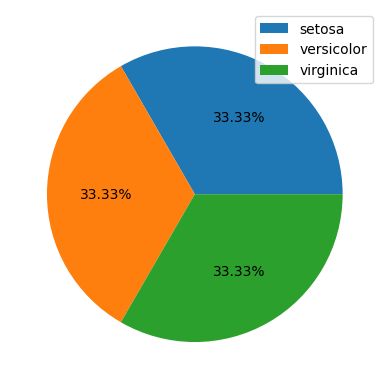

In [9]:
plt.pie(df.iris_class.value_counts(), autopct='%1.2f%%')
plt.legend(df.iris_class.unique())

All iris_class has equal count

In [10]:
import seaborn as sns

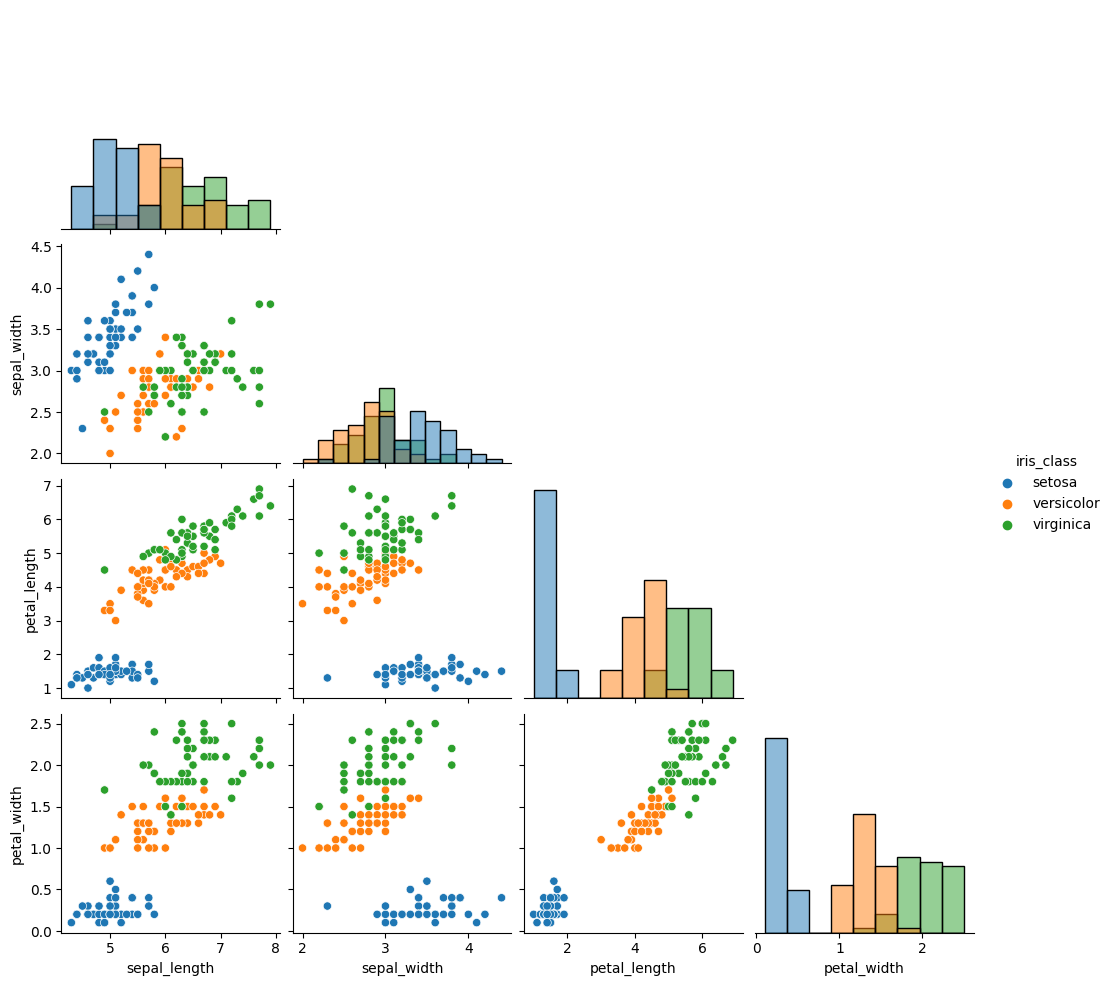

In [11]:
sns.pairplot(df,hue='iris_class',corner=True,diag_kind='hist')

In [12]:
df.corr()

C:\Users\jivan\AppData\Local\Temp\ipykernel_19884\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


---
Split train-test data

In [18]:
X = df.iloc[:,:-1] # Input
y = df.iloc[:,-1] # Output

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [43]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(X_train)
# X_train = ss.transform(X_train)
# X_test = ss.transform(X_test)

---
Feature Transformation - Encoding Categorical Data 


In [81]:
# Label Encoding to tranform iris_class feature to numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [94]:
from sklearn.linear_model import LogisticRegression

In [109]:
clr = LogisticRegression()
clr.fit(X_train,y_train_encoded)
y_pred = clr.predict(X_test)

Model performance

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_encoded,y_pred)

1.0

In [106]:
from sklearn import metrics

In [111]:
print(metrics.classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [112]:
print(metrics.confusion_matrix(y_test_encoded,y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
